#  Classification Project: Iris Flower Classification

#### Objective:
Build a model to classify iris flowers into three species (setosa, versicolor, virginica) based on their features.

#### Dataset:
Iris dataset from scikit-learn.

#### Steps:

1. **Data Loading and Exploration**
2. **Data Preprocessing**
3. **Model Training**
4. **Model Evaluation**



# Summary of the Iris Dataset

The Iris dataset is a classic and widely used dataset in the field of machine learning. It consists of 150 samples from three species of Iris flowers: setosa, versicolor, and virginica. Each sample has four features:

1. **Sepal length (cm)**
2. **Sepal width (cm)**
3. **Petal length (cm)**
4. **Petal width (cm)**

These features are numerical and provide various measurements of the flowers' physical characteristics.

#### Species Distribution:
- **Setosa**: 50 samples
- **Versicolor**: 50 samples
- **Virginica**: 50 samples

### Objective

The primary objective of this project is to build a machine learning model that can accurately classify iris flowers into one of the three species based on their physical characteristics. Specifically, we aim to:

1. **Explore and visualize the Iris dataset** to understand the distributions and relationships between the features.
2. **Preprocess the data** by splitting it into training and testing sets and standardizing the feature values.
3. **Train a classification model** using logistic regression to predict the species of iris flowers.
4. **Evaluate the model's performance** using metrics such as accuracy, classification report, and confusion matrix.

# 1. Data Loading and Exploration

### Data Loading and Exploration

#### Summary:
Data loading and exploration is a crucial first step in any machine learning project. It involves importing the dataset, converting it into a suitable format for analysis, and understanding its basic structure and characteristics. This step is essential because it helps identify the data's underlying patterns, relationships, and potential issues, which can inform subsequent preprocessing and modeling steps.

#### Importance:
- **Understanding Structure**: Helps in grasping the dataset's dimensions, data types, and basic statistics.
- **Identifying Patterns**: Reveals patterns, trends, and relationships between variables.
- **Detecting Anomalies**: Helps spot missing values, outliers, or inconsistencies in the data.
- **Guiding Preprocessing**: Informs decisions on necessary data transformations, such as scaling, encoding, and splitting.


In [2]:
!pip install pandas  # Install the pandas library for data manipulation and analysis
!pip install scikit-learn  # Install the scikit-learn library for machine learning algorithms
!pip install seaborn  # Install the seaborn library for statistical data visualization
!pip install matplotlib  # Install the matplotlib library for creating static, animated, and interactive visualizations



ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


In [3]:
import pandas as pd  # Importing pandas for data manipulation and analysis
from sklearn.datasets import load_iris  # Importing function to load the iris dataset
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for the classification model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importing metrics for model evaluation
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs


In [4]:
# Load the Iris dataset
iris = load_iris()  # Loading the Iris dataset into a variable

In [5]:
iris  # Displaying the loaded Iris dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# Create a DataFrame with feature data
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Creating a DataFrame with the feature data

In [7]:
data  # Displaying the DataFrame containing the feature data from the Iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


1. **sepal length (cm)**: Length of the sepal in centimeters.
2. **sepal width (cm)**: Width of the sepal in centimeters.
3. **petal length (cm)**: Length of the petal in centimeters.
4. **petal width (cm)**: Width of the petal in centimeters.


In [8]:
data['species'] = iris.target  # Adding the target labels (species) to the DataFrame

In [9]:
# Mapping target names to species
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapping numerical target labels to species names

In [10]:
data['species'] = data['species'].astype('category')  # Converting the 'species' column to a categorical data type


In [11]:
# Explore the dataset
data.head()  # Displaying the first few rows of the DataFrame to get an overview of the dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
data.describe()  # Generating summary statistics for the numerical columns in the DataFrame


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data['species'].value_counts()  # Counting the occurrences of each species in the 'species' column


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
# Check the updated data types
print(data.dtypes)


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object


# Data Preprocessing

#### Summary:
Data preprocessing is a vital step in preparing raw data for analysis and machine learning modeling. It involves transforming the data into a clean, standardized, and suitable format for further processing. This step is important because it enhances the quality of the data, ensuring that the machine learning algorithms can learn effectively and make accurate predictions.

#### Importance:
- **Data Cleaning**: Removes noise, handles missing values, and corrects inconsistencies.
- **Feature Scaling**: Standardizes the range of independent variables or features, which improves model performance.
- **Data Splitting**: Divides the data into training and testing sets to evaluate model performance.
- **Enhancing Model Accuracy**: Proper preprocessing leads to better model accuracy and robustness.

Standardizing and scaling data in machine learning ensures that features are on a similar scale, improving model performance, convergence speed, and the accuracy of algorithms.

In [15]:
from sklearn.model_selection import train_test_split  # Importing function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for feature scaling


In [16]:
# Split the dataset into training and testing sets
X = data.drop('species', axis=1)  # Dropping the 'species' column to create feature set X
y = data['species']  # Defining the target variable y as the 'species' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting the data into training (70%) and testing (30%) sets


Feature scaling is the process of standardizing the range of independent variables or features in the dataset. It ensures that no single feature dominates others due to differences in scale, improving the performance and convergence speed of machine learning algorithms.


In [17]:
# Scale the features
scaler = StandardScaler()  # Creating a StandardScaler object for feature scaling
X_train_scaled = scaler.fit_transform(X_train)  # Fitting the scaler to the training data and transforming it
X_test_scaled = scaler.transform(X_test)  # Transforming the test data using the fitted scaler


# 3. Model Training

Model training in machine learning involves feeding a model data and allowing it to learn patterns and relationships within that data

Logistic Regression is a binary classification algorithm that predicts the probability of an outcome between 0 and 1 using a logistic function. It estimates the relationship between variables by minimizing the log-loss cost function, making it useful and interpretable for classification tasks.

In [18]:
from sklearn.linear_model import LogisticRegression  # Importing LogisticRegression for the classification model
# LogisticRegression is a class in scikit-learn used for binary classification tasks.


In [19]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='multinomial', random_state=42)  
# 'max_iter=200' sets the maximum number of iterations for the solver to converge.
# 'solver='lbfgs'' specifies the optimization algorithm to use.
# 'multi_class='multinomial'' indicates a multinomial logistic regression for multi-class classification.
# 'random_state=42' sets the seed for random number generation to ensure reproducibility.


# Creating a Logistic Regression model with the following parameters:
- `max_iter=200`: Setting the maximum number of iterations for the solver to converge.
- `solver='lbfgs'`: Using the 'lbfgs' solver which is efficient for multiclass problems.
- `multi_class='multinomial'`: Using the multinomial loss function for multiclass classification.
- `random_state=42`: Setting a random state for reproducibility.

A solver in machine learning is a method used to find the best parameters for a model. In Logistic Regression, `solver='lbfgs'` is a specific method that helps efficiently find these parameters, especially for complex, multiclass problems. It's like using a specific tool to solve a math problem.


# Why Model Fitting is Needed
Model fitting is the process of training a machine learning model on a dataset so that it can learn the relationships between the features (input variables) and the target (output variable). This is necessary because:

In [20]:
# Train the model using the training data
model.fit(X_train_scaled, y_train)  # Fitting the model to the scaled training data to learn the relationships

LogisticRegression(max_iter=200, multi_class='multinomial', random_state=42)

# Evaluate the model

In [21]:
# Predict the species for the test data
y_pred = model.predict(X_test_scaled)  # Using the trained model to predict the species for the test set


# Understanding Evaluation Metrics

## Precision, Recall, F1-Score, and Support

- **Precision**: How often are the model's positive predictions correct?
  - High precision means the model makes few mistakes when it predicts positive.
  - Example: If the model says 10 flowers are setosa and 9 of them are actually setosa, precision is high.


- **Recall**: How well does the model find all the actual positives?
  - High recall means the model misses few real positives.
  - Example: If there are 10 setosa flowers and the model finds 9 of them, recall is high.

- **F1-Score**: How well does the model balance precision and recall?
  - It's useful when you need a balance of both.
  - Example: If you need both high precision and high recall, the F1-Score shows how well the model does on both.

- **Support**: How many examples are there for each class in the dataset?
  - It shows how many instances of each class you have.
  - Example: If you have 50 setosa flowers, 50 is the support for the setosa class.

## Accuracy
- **Accuracy**: The ratio of correctly predicted instances to the total instances.
  - High accuracy means the model predicts correctly most of the time.
  - Example: If the model correctly predicts 95 out of 100 instances, accuracy is 95%.

## Macro Average
- **Macro Average**: The average of precision, recall, and F1-score calculated for each class independently, then averaged.
  - It treats all classes equally, regardless of their support.
  - Example: If you have three classes, the macro average precision is the average of the precision values for all three classes.

## Weighted Average
- **Weighted Average**: The average of precision, recall, and F1-score calculated for each class, weighted by the number of instances (support) of each class.
  - It takes into account the imbalance in the dataset.
  - Example: If one class is much larger than the others, the weighted average will give more importance to the performance on that class.

## Why These Metrics Matter
These metrics help you understand how well your model is performing:

- **Precision**: Important when you need accurate positive predictions.
- **Recall**: Important when you want to find all positive cases.
- **F1-Score**: Important when you need a good balance between precision and recall.
- **Support**: Helps you see how many examples of each class you have, giving context to the other metrics.
- **Accuracy**: Gives an overall performance measure, useful for binary and balanced multiclass problems.
- **Macro Average**: Important for evaluating performance equally across all classes.
- **Weighted Average**: Important for reflecting the performance on the dataset as a whole, especially with class imbalance.

Together, these metrics give a clear picture of your model's performance, especially in multiclass classification problems.



In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy of the model
classification_rep = classification_report(y_test, y_pred)  # Generating the classification report

# Printing the evaluation results
print("Model Accuracy:", accuracy)  # Printing the accuracy of the model
print("Classification Report:\n", classification_rep)  # Printing the classification report


Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



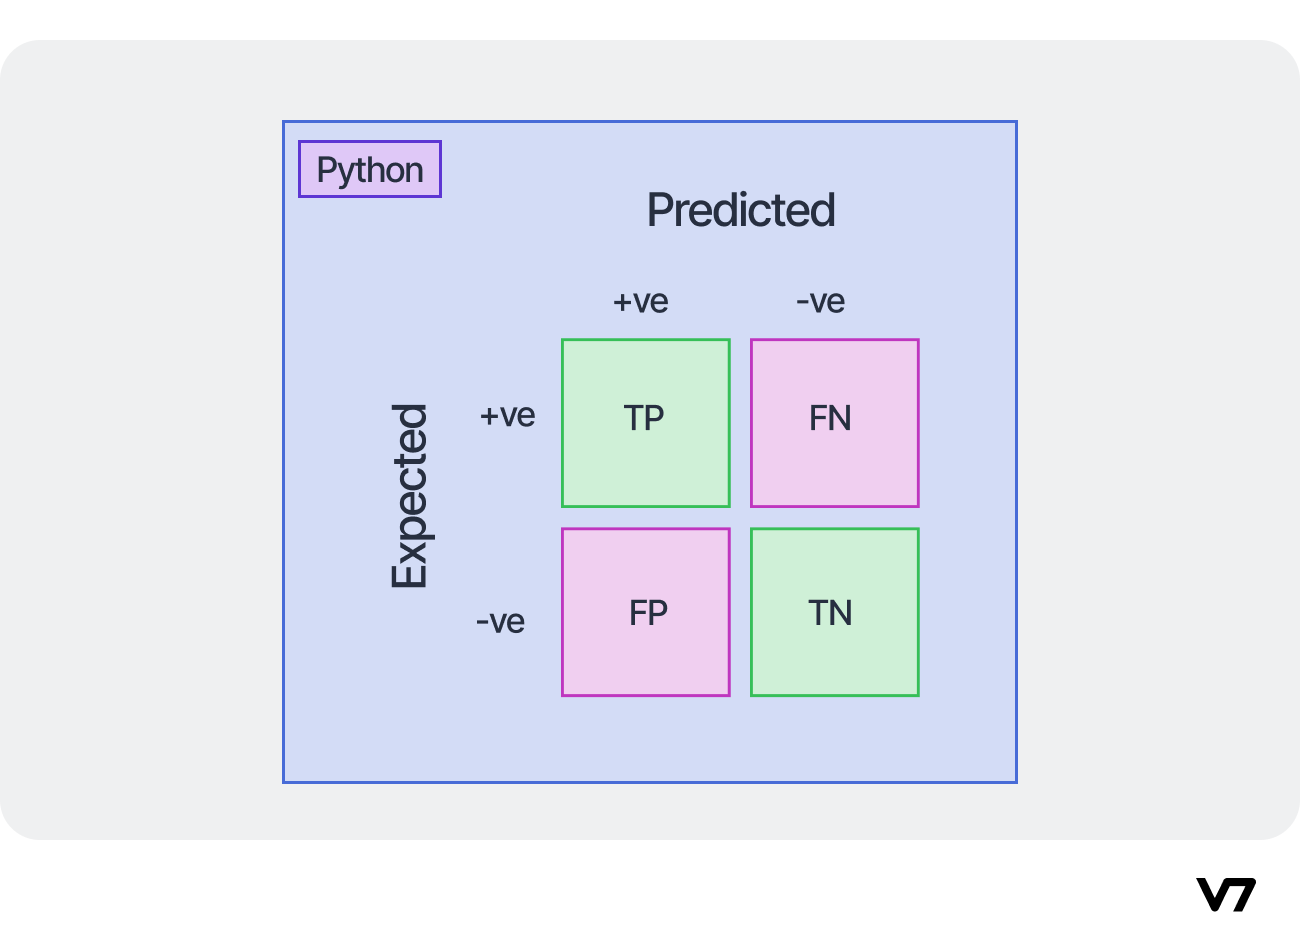

In [25]:
from IPython.display import Image, display

# Display the image
image_path = "636b93290271e592a8e8df9f_Python.png"
display(Image(filename=image_path))


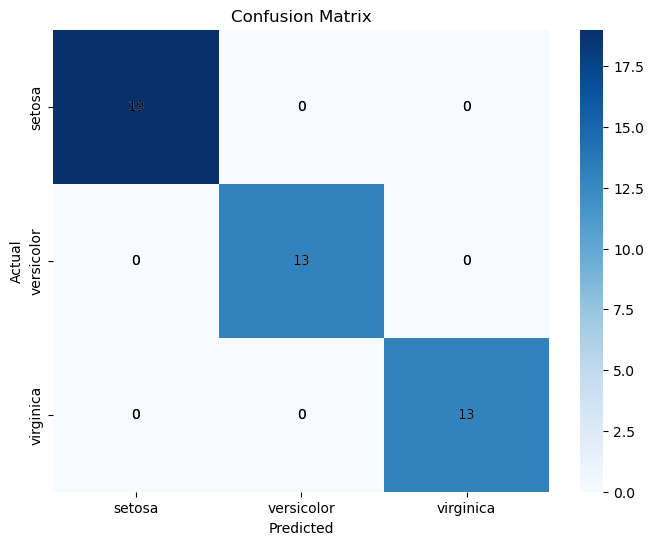

In [21]:
# Visualize the confusion matrix with explicit annotations
plt.figure(figsize=(8, 6))  # Setting the figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)  # Creating a heatmap with annotations
plt.xlabel('Predicted')  # Labeling the x-axis
plt.ylabel('Actual')  # Labeling the y-axis
plt.title('Confusion Matrix')  # Adding a title to the plot

# Explicitly annotate each cell with integer values
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', ha='center', va='center', color='black')  # Annotating each cell with its value

plt.show()  # Displaying the plot


In [22]:
import joblib  # Importing joblib for saving and loading the model

# Save the trained model to a file
model_filename = 'logistic_regression_model.joblib'  # Defining the filename for the saved model
joblib.dump(model, model_filename)  # Saving the model to the file
print(f"Model saved to {model_filename}")  # Printing a confirmation message

# Load the model from the file
loaded_model = joblib.load(model_filename)  # Loading the model from the file
print("Model loaded successfully")  # Printing a confirmation message



Model saved to logistic_regression_model.joblib
Model loaded successfully


In [25]:
# Load the new data
new_data = pd.read_csv('new_data.csv')  # Loading new data from a CSV file
print("New data loaded successfully")  # Printing a confirmation message
new_data  # Displaying the first few rows of the new data


New data loaded successfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,6.5,3.0,5.2,2.0
2,5.9,3.0,5.1,1.8
3,4.7,3.2,1.3,0.2
4,7.0,3.2,4.7,1.4
5,6.3,3.3,6.0,2.5
6,5.8,2.7,5.1,1.9


In [26]:
scaler = StandardScaler()
scaler.fit(new_data)  # Fit the scaler on the new data
new_data_scaled = scaler.transform(new_data)  # Transform the new data using the fitted scaler


In [27]:
# Predict the species for the new data using the loaded model
new_predictions = loaded_model.predict(new_data_scaled)  # Using the loaded model to predict the species for the new data

# Print the predictions
print("Predictions for the new data:")
print(new_predictions)  # Displaying the predictions for the new data


Predictions for the new data:
['setosa' 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'virginica']
